# PIC 16A Final Project - Predicting Spam Emails
## Olivia Weisiger, Madeline Chew, Yanming (Steven) Chen

### Preliminary Steps

In [1]:
# Loading required packages
import pandas as pd
# m pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# This cell imports your functions defined in FinalProjectFunctions.py 
# from myFinalProjectFunctions import get_common_words, text_to_dict 
from FinalProjectFunctions import isSpam, graphMispellings

In [2]:
# Reading the data
# Spam = 1; not = 0
email_data = pd.read_csv("spam_ham_dataset.csv")
email_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


We can see that our data was loaded correctly and is comprised of a label ('spam' or 'ham'), text (subject and body of the email), and a label number (1 = spam; 0 = ham).

## Spam vs Ham Data Exploration

### Mispelling Frequency Plots

First, we will create separate text column lists depending on if the email was labeled as 'spam' or 'ham'.

In [3]:
#initialize empty lists to store the spam and ham email texts
spamEmails = []
hamEmails = []

#iterate through the dataset of email text
for i in range(len(email_data[0:24])):
    #if the dataset's email is labeled as 'spam' append to spamEmails list
    if email_data['label'][i] == 'spam' :
        spamEmails.append(email_data['text'][i])
    #if the dataset's email is labeled as 'ham' append to hamEmails list
    else :
        hamEmails.append(email_data['text'][i])
        
#change lists to panda series to put into the class
# **Only taking first 25 for efficiency purposes**
spamSet = pd.Series(spamEmails)
hamSet = pd.Series(hamEmails)

#make instances of class isSpam for the spam and ham datasets
spamSet = isSpam(spamSet)
hamSet = isSpam(hamSet)

#call the get_mispelled_words() function to get a list of the number of mispelled words
spamList = spamSet.get_mispelled_words()[1]
hamList = hamSet.get_mispelled_words()[1]

#call the get_mispelling_duplicates() function to get a list of the number of repeated mispelled words
spamListRepeated = spamSet.get_mispelling_duplicates()[1]
hamListRepeated = hamSet.get_mispelling_duplicates()[1]

<AxesSubplot:xlabel='Emails', ylabel='# of Mispellings'>

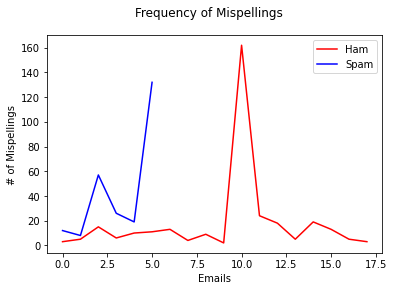

In [4]:
# use the graphMispellings() function to compare the amount of mispellings in spam vs ham emails
graphMispellings(spamList, hamList)

From the graph, we can see spam emails tend to have a higher number of mispellings compared to ham emails, so it would be a relevant variable to use to predict if an email is spam or ham.

<AxesSubplot:xlabel='Emails', ylabel='# of Mispellings'>

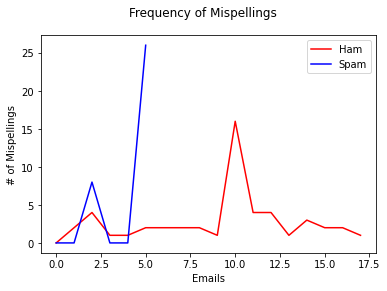

In [5]:
# use the graphMispellings() function to compare the amount of repeated mispellings in spam vs ham emails
graphMispellings(spamListRepeated, hamListRepeated)

From the graph, we can see spam emails tend to have a higher number of repeatedmispellings compared to ham emails, so it would be a relevant variable to use to predict if an email is spam or ham.

Using a similar method to creating the `spamSet` and `hamSet` instances above, we will construct a word cloud of the most common words used in 'spam' vs 'ham' emails.

### Common Words - Word Cloud

#### Preparing Text Input to Create the Word Clouds

In [6]:
#initialize empty lists to store the spam and ham email texts
spamEmails = []
hamEmails = []

#iterate through the dataset of email text
for i in range(len(email_data)):
    #if the dataset's email is labeled as 'spam' append to spamEmails list
    if email_data['label'][i] == 'spam' :
        spamEmails.append(email_data['text'][i])
    #if the dataset's email is labeled as 'ham' append to hamEmails list
    else :
        hamEmails.append(email_data['text'][i])
        
#change lists to panda series to put into the class
full_spamSet = pd.Series(spamEmails)
full_hamSet = pd.Series(hamEmails)

#make instances of class isSpam for the spam and ham datasets
full_spamSet = isSpam(full_spamSet)
full_hamSet = isSpam(full_hamSet)

#call the get_common_words(1) function to get a list of the most frequntly occuring words
full_spamList = full_spamSet.get_common_words(1)
full_hamList = full_hamSet.get_common_words(1)

# Isolate spam/ham words from their occurence frequency and create list
all_spam_words = [[word[0] for word in pair] for pair in full_spamList]
all_ham_words = [[word[0] for word in pair] for pair in full_hamList]

# join most common spam words into one string
spam_text = " ".join([item for sublist in all_spam_words for item in sublist])

# join most common ham words into one string
ham_text = " ".join([item for sublist in all_ham_words for item in sublist])

#### Creating the Word Clouds

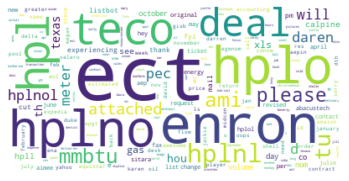

In [7]:
# Creating word_cloud with text as argument in .generate() method
word_cloud_HAM = WordCloud(collocations = False, background_color = 'white').generate(ham_text)
# Display the generated Word Cloud
plt.imshow(word_cloud_HAM, interpolation='bilinear')
plt.axis("off")
plt.show()

From the ham word cloud, we can see that our man-built `get_common_words()` function allows for many typos and stop words, which when building a model, we hope to avoid. Many of the words appear to be nonsense, despite the fact that these are the most commonly occuring words in the ham emails.

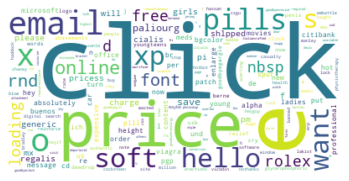

In [8]:
# Creating word_cloud with text as argument in .generate() method
word_cloud_SPAM = WordCloud(collocations = False, background_color = 'white').generate(spam_text)
# Display the generated Word Cloud
plt.imshow(word_cloud_SPAM, interpolation='bilinear')
plt.axis("off")
plt.show()

Comparatively, from the spam word cloud, we surprisingly see that the most commonly used words appear to be less nonsensical than those in the ham word cloud. We can see that the most commonly used word across all spam emails is 'click', which makes sense in the context of advertising to individuals through spam emails, and wanting them to interact/react to the material.

### Creating A Model